In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

pd.pandas.set_option('display.max_columns' ,None)

In [207]:
os.chdir(r'C:\Users\prati\OneDrive\Desktop\Siddhesh\fracture analysis')

In [208]:
data = pd.read_excel('Dataset.xlsx')

In [209]:
data

,SI.NO,DATE,NAME,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
0,1,2017-02-01 00:00:00,PATIENT_1,29,Male,no,no,no,"115, 115, 113",114.30
1,2,2017-03-01 00:00:00,PATIENT_2,36,Female,no,no,no,"95,94,96",94.00
2,3,2017-03-01 00:00:00,PATIENT_3,37,Male,no,no,no,"80,82,81",81.00
3,4,2017-03-01 00:00:00,PATIENT_4,37,Female,no,no,no,"100, 101, 100",100.33
4,5,2017-03-01 00:00:00,PATIENT_5,38,female,no,no,no,99100100.4,99.80
...,...,...,...,...,...,...,...,...,...,...
995,996,12/29/2017,PATIENT_996,72,Male,no,no,no,"68, 69, 68",68.30
996,997,12/29/2017,PATIENT_997,72,Male,"Yes(Diabetes,Blockage in Heart)",shouler surgery,yes,"69,70,71",70.00
997,998,12/31/2017,PATIENT_998,74,Female,"yes(diabetes,bp)",knee surgery,yes,"63,62,62.6",62.53
998,999,12/31/2017,PATIENT_999,76,Male,"yes(diabetes,kidney stone)",no,no,"62,61,62.5",61.83


In [210]:
data.isnull().sum()

SI.NO                 0
DATE                  0
NAME                  0
AGE                   0
SEX                   0
ASSO MEDICAL PROB     0
H/O INJURY/SURGERY    0
DRUG HISTORY          0
FREQUENCY             0
avg                   0
dtype: int64

In [211]:
data['avg'].unique()

array([114.3  ,  94.   ,  81.   , 100.33 ,  99.8  ,  99.83 ,  98.3  ,
        88.33 ,  91.   ,  89.77 ,  84.   ,  85.77 ,  91.67 ,  80.   ,
        84.66 ,  88.66 ,  80.93 ,  78.16 ,  78.   ,  79.8  ,  77.   ,
        77.3  ,  72.88 ,  72.   ,  81.16 ,  72.7  ,  70.66 ,  69.5  ,
        66.   ,  75.7  ,  64.166,  71.   ,  68.66 ,  69.   ,  67.66 ,
        61.33 ,  62.166,  70.16 ,  75.833,  65.8  ,  64.9  ,  68.3  ,
        70.   ,  62.53 ,  61.83 ,  63.   ])

In [212]:
data['avg'].value_counts()

70.660     40
99.800     40
88.330     40
69.000     40
114.300    20
61.330     20
69.500     20
66.000     20
75.700     20
64.166     20
71.000     20
68.660     20
67.660     20
62.166     20
81.160     20
70.160     20
75.833     20
65.800     20
64.900     20
68.300     20
70.000     20
62.530     20
61.830     20
72.700     20
72.000     20
94.000     20
91.670     20
81.000     20
100.330    20
99.830     20
98.300     20
91.000     20
89.770     20
84.000     20
85.770     20
80.000     20
72.880     20
84.660     20
88.660     20
80.930     20
78.160     20
78.000     20
79.800     20
77.000     20
77.300     20
63.000     20
Name: avg, dtype: int64

In [213]:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>1]

In [214]:
data.columns

Index(['SI.NO', 'DATE', 'NAME', 'AGE', 'SEX', 'ASSO MEDICAL PROB',
       'H/O INJURY/SURGERY', 'DRUG HISTORY', 'FREQUENCY', 'avg'],
      dtype='object')

In [215]:
data.describe()

,SI.NO,AGE,avg
count,1000.000000,1000.000000,1000.000000
mean,500.500000,56.520000,78.346700
std,288.819436,12.390445,12.431321
min,1.000000,29.000000,61.330000
25%,250.750000,45.000000,69.000000
50%,500.500000,56.500000,76.416500
75%,750.250000,67.000000,88.330000
max,1000.000000,85.000000,114.300000


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SI.NO               1000 non-null   int64  
 1   DATE                1000 non-null   object 
 2   NAME                1000 non-null   object 
 3   AGE                 1000 non-null   int64  
 4   SEX                 1000 non-null   object 
 5   ASSO MEDICAL PROB   1000 non-null   object 
 6   H/O INJURY/SURGERY  1000 non-null   object 
 7   DRUG HISTORY        1000 non-null   object 
 8   FREQUENCY           1000 non-null   object 
 9   avg                 1000 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


In [217]:
data.shape


(1000, 10)

In [218]:
data.isnull().any(axis=0)

SI.NO                 False
DATE                  False
NAME                  False
AGE                   False
SEX                   False
ASSO MEDICAL PROB     False
H/O INJURY/SURGERY    False
DRUG HISTORY          False
FREQUENCY             False
avg                   False
dtype: bool

In [219]:
for feature in ['AGE','ASSO MEDICAL PROB','DATE','SEX','H/O INJURY/SURGERY','DRUG HISTORY']:
    print(feature,' ',data[feature].unique())

AGE   [29 36 37 38 39 41 42 44 45 48 49 52 53 55 56 57 60 61 62 63 64 66 67 68
 69 70 72 74 76 85]
ASSO MEDICAL PROB   ['no' 'No' 'yes(diabetes)' 'yes (diabetes)' 'yes(bp)' 'kidney stone'
 'yes(increase in heart rate)' 'Yes(Diabetes,bp)' 'yes(bp dabetes)'
 'yes(diabetes,bp)' 'Yes(Diabetes,Blockage in Heart)'
 'yes(diabetes,kidney stone)' 'yes (diabetes,heart blockage)']
DATE   [datetime.datetime(2017, 2, 1, 0, 0) datetime.datetime(2017, 3, 1, 0, 0)
 datetime.datetime(2017, 4, 1, 0, 0) datetime.datetime(2017, 5, 1, 0, 0)
 datetime.datetime(2017, 6, 1, 0, 0) datetime.datetime(2017, 7, 1, 0, 0)
 datetime.datetime(2017, 8, 1, 0, 0) datetime.datetime(2017, 9, 1, 0, 0)
 datetime.datetime(2017, 10, 1, 0, 0) datetime.datetime(2017, 11, 1, 0, 0)
 datetime.datetime(2017, 12, 1, 0, 0) '1/13/2017' '1/14/2017' '1/15/2017'
 '1/16/2017' '1/17/2017' '1/18/2017' '1/19/2017' '1/20/2017' '1/21/2017'
 '1/22/2017' '1/23/2017' '1/24/2017' '1/25/2017' '1/27/2017' '1/28/2017'
 '1/29/2017' '1/30/2017' '1/31/20

In [220]:
for feature in ['AGE','ASSO MEDICAL PROB','DATE','SEX','H/O INJURY/SURGERY','DRUG HISTORY']:
    print(feature,'\n',data[feature].value_counts())

AGE 
 56    80
68    60
66    60
52    60
45    60
57    40
60    40
55    40
67    40
69    40
72    40
39    40
37    40
62    40
63    20
70    20
74    20
76    20
64    20
29    20
61    20
36    20
53    20
49    20
48    20
44    20
42    20
41    20
38    20
85    20
Name: AGE, dtype: int64
ASSO MEDICAL PROB 
 no                                 480
No                                 160
yes(diabetes)                      100
yes(bp)                             60
yes(diabetes,bp)                    40
yes (diabetes)                      20
kidney stone                        20
yes(increase in heart rate)         20
Yes(Diabetes,bp)                    20
yes(bp dabetes)                     20
Yes(Diabetes,Blockage in Heart)     20
yes(diabetes,kidney stone)          20
yes (diabetes,heart blockage)       20
Name: ASSO MEDICAL PROB, dtype: int64
DATE 
 2/25/2017              8
1/24/2017              7
2017-07-08 00:00:00    7
9/20/2017              7
8/23/2017              6
   

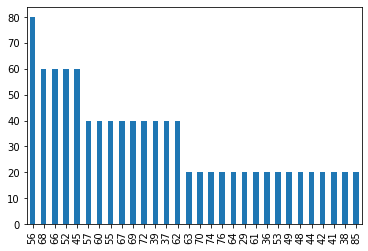

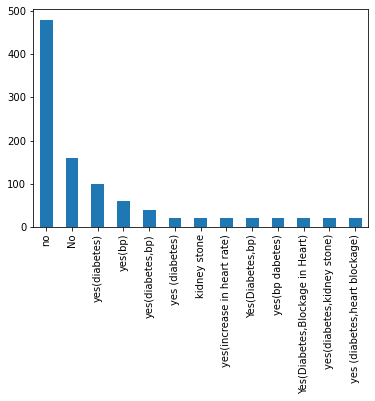

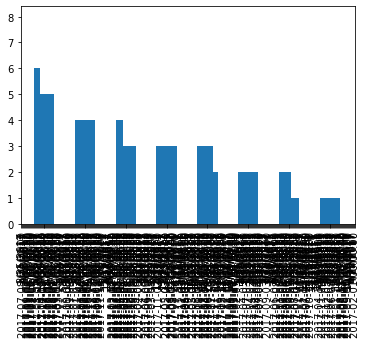

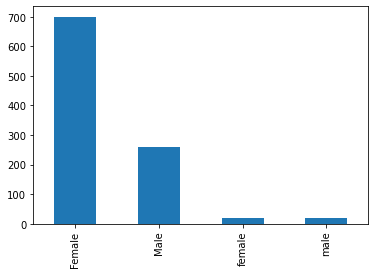

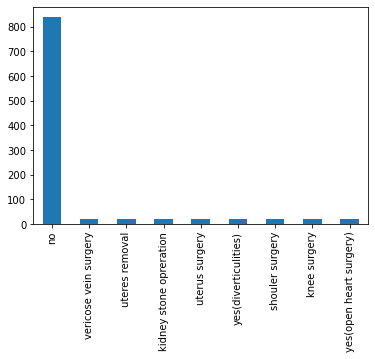

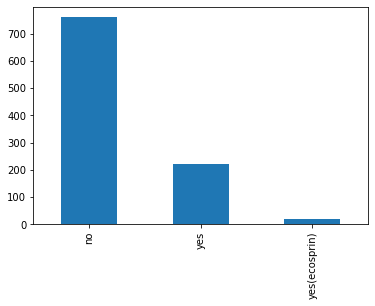

In [221]:
for feature in ['AGE','ASSO MEDICAL PROB','DATE','SEX','H/O INJURY/SURGERY','DRUG HISTORY']:
    data[feature].value_counts().plot.bar()
    plt.show()

In [222]:
data.dtypes

SI.NO                   int64
DATE                   object
NAME                   object
AGE                     int64
SEX                    object
ASSO MEDICAL PROB      object
H/O INJURY/SURGERY     object
DRUG HISTORY           object
FREQUENCY              object
avg                   float64
dtype: object

In [223]:
data['DATE']

0      2017-02-01 00:00:00
1      2017-03-01 00:00:00
2      2017-03-01 00:00:00
3      2017-03-01 00:00:00
4      2017-03-01 00:00:00
              ...         
995             12/29/2017
996             12/29/2017
997             12/31/2017
998             12/31/2017
999             12/31/2017
Name: DATE, Length: 1000, dtype: object

In [224]:
datetime.strptime('2017-02-01 00:00:00', '%Y-%m-%d %H:%M:%S').strftime('%d/%m/%Y')

'01/02/2017'

In [225]:
type(data['DATE'][0])

datetime.datetime

In [226]:
type(data['DATE'][999])

str

In [227]:
def try_parsing_date(text):
    if type(text) == str:
        return datetime.strptime(text, '%m/%d/%Y').strftime('%d/%m/%Y')
    else:
        return text.strftime('%d/%m/%Y')

In [228]:
data.DATE = [(try_parsing_date(i)) for i in data.DATE]

In [229]:
data['DATE']

0      01/02/2017
1      01/03/2017
2      01/03/2017
3      01/03/2017
4      01/03/2017
          ...    
995    29/12/2017
996    29/12/2017
997    31/12/2017
998    31/12/2017
999    31/12/2017
Name: DATE, Length: 1000, dtype: object

In [230]:
data['SEX'].value_counts()

Female    700
Male      260
female     20
male       20
Name: SEX, dtype: int64

In [231]:
data['SEX'].replace({'female':'Female', 'male':'Male'}, inplace=True)

In [232]:
data['SEX'].value_counts()

Female    720
Male      280
Name: SEX, dtype: int64

In [233]:
data['ASSO MEDICAL PROB'].value_counts()

no                                 480
No                                 160
yes(diabetes)                      100
yes(bp)                             60
yes(diabetes,bp)                    40
yes (diabetes)                      20
kidney stone                        20
yes(increase in heart rate)         20
Yes(Diabetes,bp)                    20
yes(bp dabetes)                     20
Yes(Diabetes,Blockage in Heart)     20
yes(diabetes,kidney stone)          20
yes (diabetes,heart blockage)       20
Name: ASSO MEDICAL PROB, dtype: int64

In [234]:
data['ASSO MEDICAL PROB'].replace({'No':'no', 
                                   'yes (diabetes)':'yes(diabetes)', 
                                   'Yes(Diabetes,bp)':'yes(diabetes,bp)',
                                  'Yes(Diabetes,Blockage in Heart)':'yes (diabetes,heart blockage)',
                                  'yes(bp dabetes)':'yes(diabetes,bp)'}, inplace=True)

In [235]:
data['ASSO MEDICAL PROB'].value_counts()

no                               640
yes(diabetes)                    120
yes(diabetes,bp)                  80
yes(bp)                           60
yes (diabetes,heart blockage)     40
kidney stone                      20
yes(increase in heart rate)       20
yes(diabetes,kidney stone)        20
Name: ASSO MEDICAL PROB, dtype: int64

In [236]:
data['H/O INJURY/SURGERY'].value_counts()

no                         840
vericose vein surgery       20
uteres removal              20
kidney stone opreration     20
uterus surgery              20
yes(diverticulities)        20
shouler surgery             20
knee surgery                20
yes(open heart surgery)     20
Name: H/O INJURY/SURGERY, dtype: int64

In [237]:
data['H/O INJURY/SURGERY'].replace({'uteres surgery':'uterus surgery'}, inplace=True)

In [238]:
data['H/O INJURY/SURGERY'].value_counts()

no                         840
vericose vein surgery       20
uteres removal              20
kidney stone opreration     20
uterus surgery              20
yes(diverticulities)        20
shouler surgery             20
knee surgery                20
yes(open heart surgery)     20
Name: H/O INJURY/SURGERY, dtype: int64

In [239]:
data['DRUG HISTORY'].value_counts()

no               760
yes              220
yes(ecosprin)     20
Name: DRUG HISTORY, dtype: int64

In [240]:
data.tail()

,SI.NO,DATE,NAME,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
995,996,29/12/2017,PATIENT_996,72,Male,no,no,no,"68, 69, 68",68.30
996,997,29/12/2017,PATIENT_997,72,Male,"yes (diabetes,heart blockage)",shouler surgery,yes,"69,70,71",70.00
997,998,31/12/2017,PATIENT_998,74,Female,"yes(diabetes,bp)",knee surgery,yes,"63,62,62.6",62.53
998,999,31/12/2017,PATIENT_999,76,Male,"yes(diabetes,kidney stone)",no,no,"62,61,62.5",61.83
999,1000,31/12/2017,PATIENT_1000,85,Male,"yes (diabetes,heart blockage)",yes(open heart surgery),yes,"62,63,64",63.00


In [241]:
def tv(i):
    if (i<60):
        return 'Normal'
    elif (i>=60 and i<=100):
        return 'Osteopenia'
    else:
        return 'Osteoporotic'

In [242]:
data['output'] = data['avg'].astype(int).apply(tv)

In [245]:
data[data['avg']>101]

,SI.NO,DATE,NAME,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg,output
0,1,01/02/2017,PATIENT_1,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
50,51,23/01/2017,PATIENT_51,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
100,101,02/09/2017,PATIENT_101,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
150,151,26/02/2017,PATIENT_151,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
200,201,19/03/2017,PATIENT_201,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
250,251,04/05/2017,PATIENT_251,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
300,301,27/04/2017,PATIENT_301,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
350,351,15/05/2017,PATIENT_351,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
400,401,06/03/2017,PATIENT_401,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic
450,451,22/06/2017,PATIENT_451,29,Male,no,no,no,"115, 115, 113",114.3,Osteoporotic


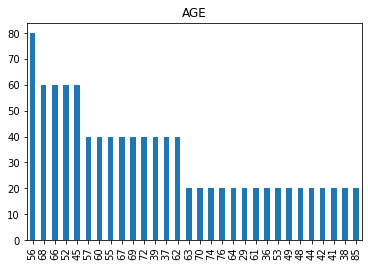

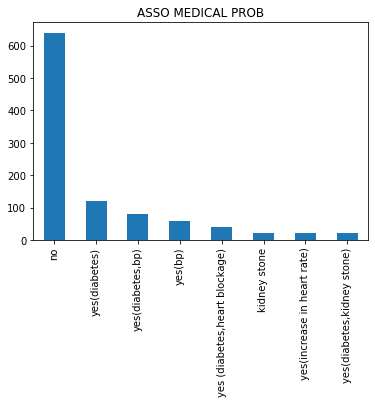

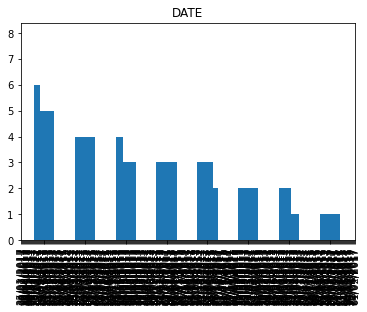

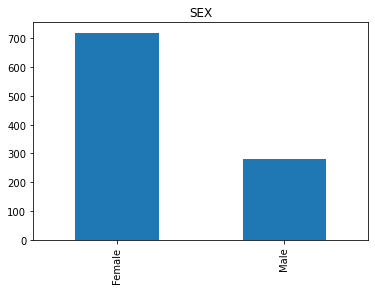

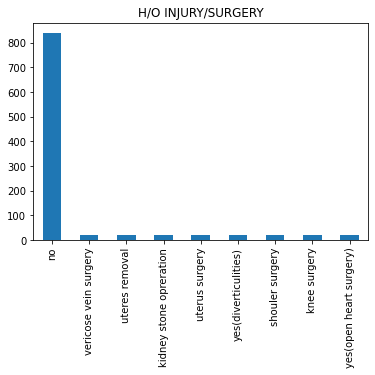

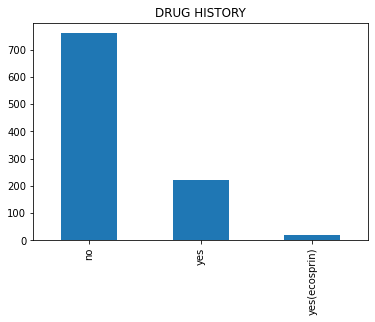

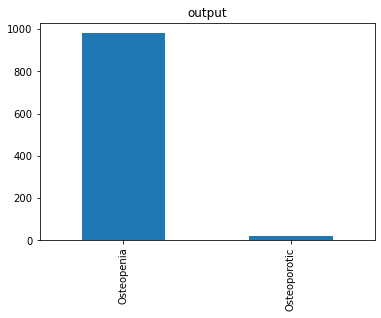

In [246]:
for feature in ['AGE','ASSO MEDICAL PROB','DATE','SEX','H/O INJURY/SURGERY','DRUG HISTORY', 'output']:
    data[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

In [297]:
x = data.drop(['output', 'SI.NO', 'DATE', 'NAME', 'FREQUENCY', 'avg'], axis=1)
y = data['output']


x

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY
0,29,Male,no,no,no
1,36,Female,no,no,no
2,37,Male,no,no,no
3,37,Female,no,no,no
4,38,Female,no,no,no
...,...,...,...,...,...
995,72,Male,no,no,no
996,72,Male,"yes (diabetes,heart blockage)",shouler surgery,yes
997,74,Female,"yes(diabetes,bp)",knee surgery,yes
998,76,Male,"yes(diabetes,kidney stone)",no,no


In [301]:
x.SEX = x.SEX.map( {'Male' : 1, 'Female' : 0 } )

x['ASSO MEDICAL PROB'] = x['ASSO MEDICAL PROB'].map( {'no' : 0, 
                                               'yes(diabetes)' : 1, 
                                               'yes(diabetes,bp)' : 2,
                                               'yes(bp)' : 3,
                                               'yes (diabetes,heart blockage)' : 4,
                                               'kidney stone' : 5,
                                               'yes(increase in heart rate)' : 6,
                                               'yes(diabetes,kidney stone)' : 7,
                                               } )

x['H/O INJURY/SURGERY'] = x['H/O INJURY/SURGERY'].map( {'no' : 0, 
                                               'vericose vein surgery' : 1, 
                                               'uteres removal' : 2,
                                               'kidney stone opreration' : 3,
                                               'uterus surgery' : 4,
                                               'yes(diverticulities)' : 5,
                                               'shouler surgery' : 6,
                                               'knee surgery' : 7,
                                               'yes(open heart surgery)' : 8,
                                               } )

x['DRUG HISTORY'] = x['DRUG HISTORY'].map( {'no' : 0, 
                                               'yes' : 1, 
                                               'yes(ecosprin)' : 2,
                                               } )


In [302]:
x

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY
0,29,1,0,0,0
1,36,0,0,0,0
2,37,1,0,0,0
3,37,0,0,0,0
4,38,0,0,0,0
...,...,...,...,...,...
995,72,1,0,0,0
996,72,1,4,6,1
997,74,0,2,7,1
998,76,1,7,0,0


In [303]:
y.value_counts()

Osteopenia      980
Osteoporotic     20
Name: output, dtype: int64

In [304]:
model = DecisionTreeClassifier()
model.fit(x, y)


DecisionTreeClassifier()

In [306]:
model.predict( [ [35,1,0,2,1] ] )

array(['Osteopenia'], dtype=object)

In [382]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test)
  
print (x_train[0:10, :])

[[ 0.62248087 -0.61009236  3.07642887  1.84342612  1.606568  ]
 [ 0.37892787 -0.61009236 -0.55893759 -0.3626186  -0.51081981]
 [-0.92002145 -0.61009236 -0.55893759 -0.3626186  -0.51081981]
 [-0.10817812 -0.61009236 -0.55893759 -0.3626186  -0.51081981]
 [ 1.43432419 -0.61009236  0.65285123  3.49795967  1.606568  ]
 [ 0.78484953 -0.61009236  0.65285123 -0.3626186  -0.51081981]
 [ 2.32735185  1.63909608  1.86464005  4.04947085  1.606568  ]
 [ 1.27195553  1.63909608 -0.55893759 -0.3626186  -0.51081981]
 [ 1.59669285  1.63909608  3.68232328 -0.3626186  -0.51081981]
 [-1.24475877 -0.61009236 -0.55893759 -0.3626186  -0.51081981]]


In [384]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

1.0

In [388]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train, y_train)

predictions = model2.predict(x_test)

score = accuracy_score(y_test, predictions)
score

1.0


In [391]:
import pickle

In [392]:
pickle.dump(model, open('Fracture_Detection.pkl','wb'))

In [393]:
load_model = pickle.load(open('Fracture_Detection.pkl','rb'))

In [394]:
y_pred_loaded = load_model.predict(x_test)

In [396]:
score_loaded = accuracy_score(y_test, y_pred_loaded)
score_loaded

1.0

In [389]:
!pip install streamlit

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=fc1c5119471b6b8e6668a4f8986825bb180b616af33070c11ee75f2bc98bf359
  Stored in directory: c:\users\prati\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [390]:
pip show streamlit

Name: streamlit
Version: 1.12.0
Summary: The fastest way to build data apps in Python
Home-page: https://streamlit.io
Author: Streamlit Inc
Author-email: hello@streamlit.io
License: Apache 2
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, packaging, gitpython, click, python-dateutil, importlib-metadata, altair, pandas, semver, typing-extensions, pillow, protobuf, requests, pydeck, tornado, rich, pympler, blinker, watchdog, cachetools, validators, tzlocal, toml, pyarrow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip show streamlit

Name: streamlit
Version: 1.12.0
Summary: The fastest way to build data apps in Python
Home-page: https://streamlit.io
Author: Streamlit Inc
Author-email: hello@streamlit.io
License: Apache 2
Location: c:\programdata\anaconda3\lib\site-packages
Requires: requests, typing-extensions, rich, tzlocal, pandas, blinker, watchdog, click, gitpython, tornado, pillow, cachetools, semver, protobuf, packaging, validators, pyarrow, pympler, importlib-metadata, python-dateutil, pydeck, toml, altair, numpy
Required-by: 


In [4]:
!pip show sklearn

In [8]:
!pip install sklearn = 0.18.0

ERROR: Invalid requirement: '='
Hint: = is not a valid operator. Did you mean == ?


In [6]:
!pip show sklearn

Name: sklearn
Version: 0.0.post1
Summary: deprecated sklearn package, use scikit-learn instead
Home-page: UNKNOWN
Author: 
Author-email: 
License: UNKNOWN
Location: c:\programdata\anaconda3\lib\site-packages
Requires: 
Required-by: 
